<a href="https://colab.research.google.com/github/sanket0708/AI_ML_Codes/blob/main/Practice/HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanketmudholkar","key":"657dbd21b2aefb265149ec9e090ecd25"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d yasserh/housing-prices-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 18.8MB/s]


In [4]:
!unzip housing-prices-dataset.zip -d housing_data

Archive:  housing-prices-dataset.zip
  inflating: housing_data/Housing.csv  


In [20]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load CSV (check folder name after unzip, sometimes filenames differ)
df = pd.read_csv("housing_data/Housing.csv")

# preview dataset
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [23]:
df.info()
df.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [25]:
print("Missing values per column:")
print(df.isna().sum())

print("\n Number of duplicates: ", df.duplicated().sum())

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 Number of duplicates:  0


In [26]:
yn_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for c in yn_cols:
  if c in df.columns:
    df[c] = df[c].map({"yes":1,"no":0})

In [29]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


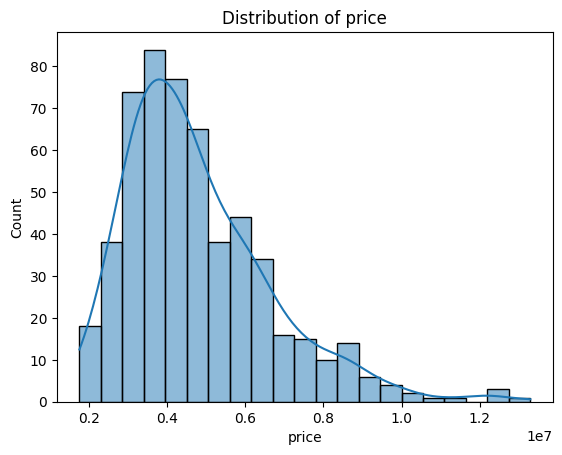

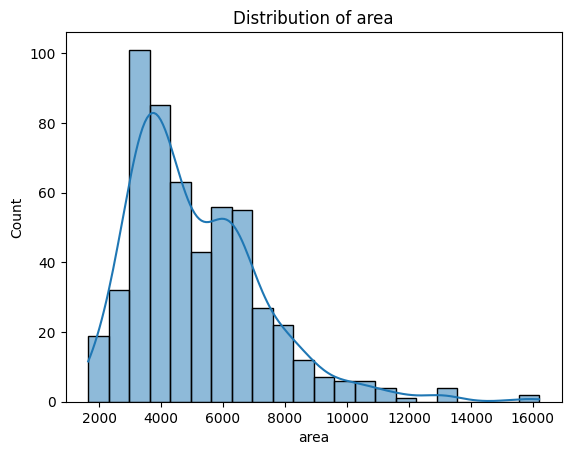

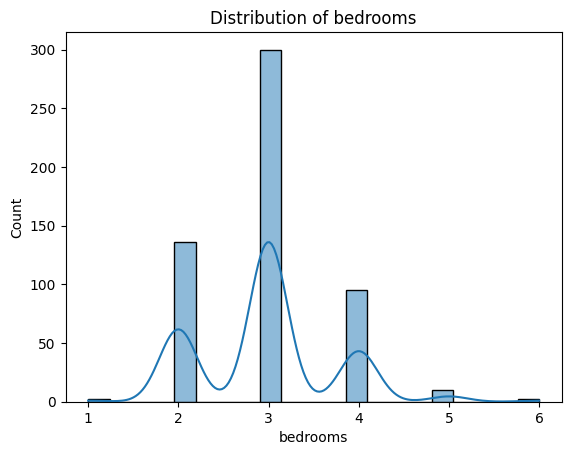

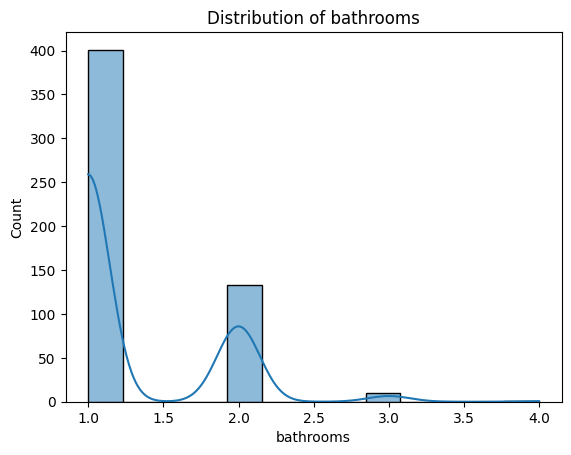

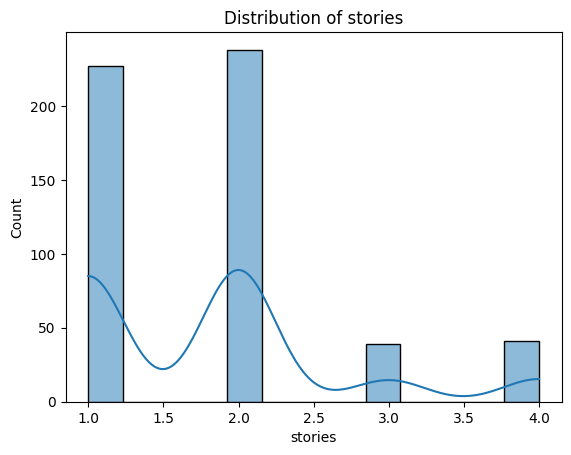

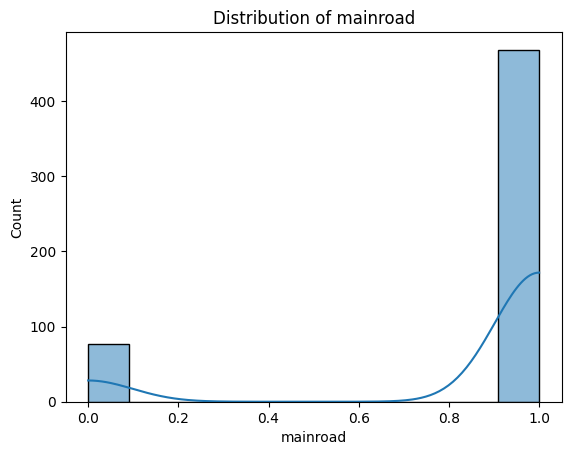

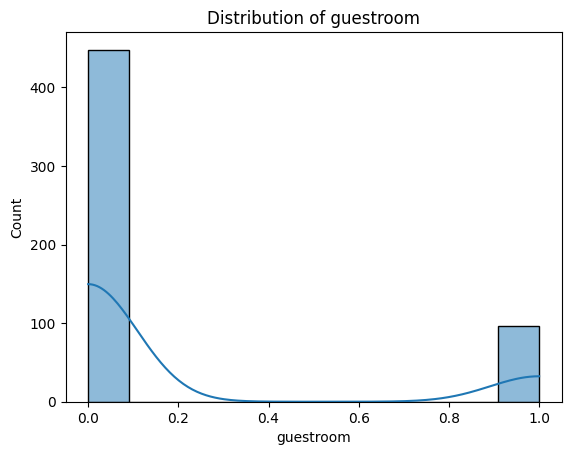

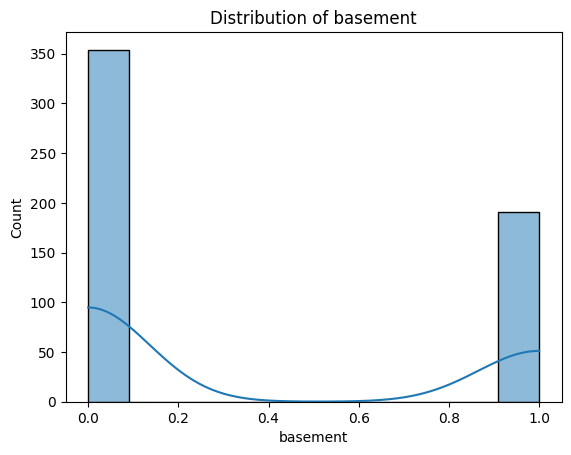

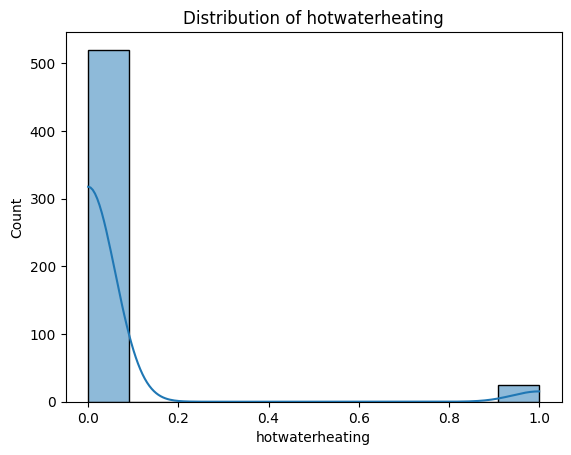

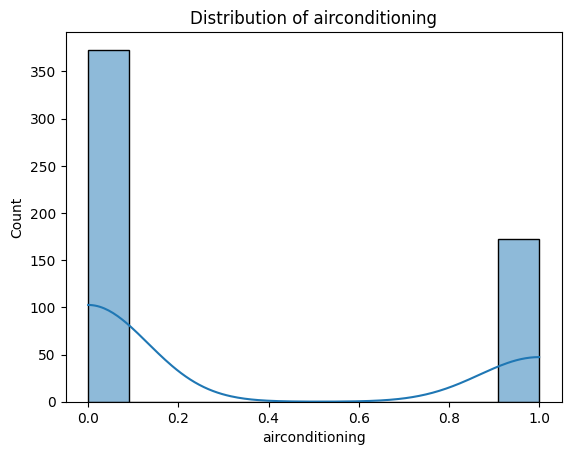

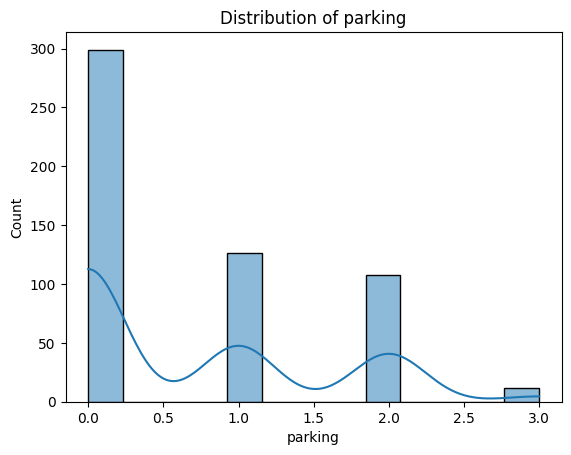

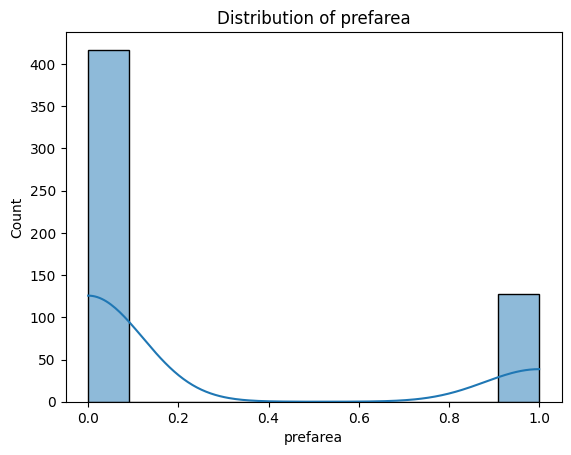

In [28]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution of {c}")
    plt.show()

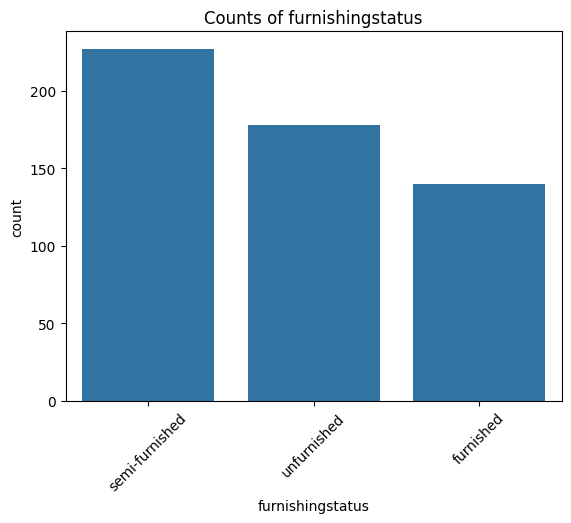

In [30]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for c in cat_cols:
    plt.figure()
    sns.countplot(x=df[c], order=df[c].value_counts().index)
    plt.title(f"Counts of {c}")
    plt.xticks(rotation=45)
    plt.show()